In [8]:
import pandas as pd

# sample of a random training parquet file
pd.read_parquet('/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/id=e0db55b1/part-0.parquet')

,step,X,Y,Z,enmo,anglez,non-wear_flag,light,battery_voltage,time_of_day,weekday,quarter,relative_date_PCIAT
0,0,-0.446179,-0.365558,-0.187522,0.045459,-14.256597,0.0,86.666664,4189.0,58140000000000,2,2,67.0
1,1,-0.590891,0.417323,-0.646285,0.032900,-41.013489,0.0,86.625000,4189.0,58145000000000,2,2,67.0
2,2,-0.292687,-0.832969,0.191943,0.131860,10.269340,0.0,86.583336,4189.0,58150000000000,2,2,67.0
3,3,-0.374539,-0.844921,-0.094638,0.093541,-5.946640,0.0,86.541664,4189.0,58155000000000,2,2,67.0
4,4,-0.258278,-0.708811,0.030687,0.093679,-1.146676,0.0,86.500000,4189.0,58160000000000,2,2,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
409952,409952,-0.808071,0.404401,0.417847,0.011306,25.030476,0.0,0.000000,3683.0,34300000000000,5,3,91.0
409953,409953,-0.383395,-0.020831,0.893038,0.021951,65.460022,0.0,0.000000,3683.0,34305000000000,5,3,91.0
409954,409954,-0.303375,0.003578,0.719480,0.082728,53.658672,0.0,0.000000,3683.0,34310000000000,5,3,91.0
409955,409955,-0.605580,0.179071,-0.184914,0.041690,-13.051332,0.0,0.000000,3683.0,34315000000000,5,3,91.0


In [2]:
import os

# path to the series_train.parquet directory
series_train_dir = '/kaggle/input/child-mind-institute-problematic-internet-use/series_train.parquet/'

# list directories/ids from training parquet by removing prefix 'id='
train_dirs = [name[3:] for name in os.listdir(series_train_dir) if os.path.isdir(os.path.join(series_train_dir, name)) and name.startswith('id=')]

In [7]:
print(len(train_dirs),' directories/ids in training parquet file')
train_dirs[:5]

996  directories/ids in training parquet file


['0745c390', 'eaab7a96', '8ec2cc63', 'b2987a65', '7b8842c3']

In [41]:
# no duplicates in training parquet ids
[item for item in set(train_dirs) if train_dirs.count(item) > 1]

[]

BELOW training.csv -> 3960 IDs, no duplicates

In [14]:
# Path to the train.csv file
csv_file_path = '/kaggle/input/child-mind-institute-problematic-internet-use/train.csv'

# Load the CSV file
train_df = pd.read_csv(csv_file_path)

# list duplicates in column id
train_df[train_df.duplicated(subset='id')]

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii


In [15]:
# number of ids in train.csv
len(train_df['id'])

3960

In [28]:
# number of ids present in both parquet and csv training files (all 996 ids in parquet are in train.csv)
len(set(train_dirs).intersection(train_df['id'].to_list()))

996

Understanding how the SII is assigned from PCIAT-PCIAT_Total -> Scatterplot

In [66]:
# 2736 sii non-null values in the train csv
len(train_df[['PCIAT-PCIAT_Total', 'sii']].dropna())

2736

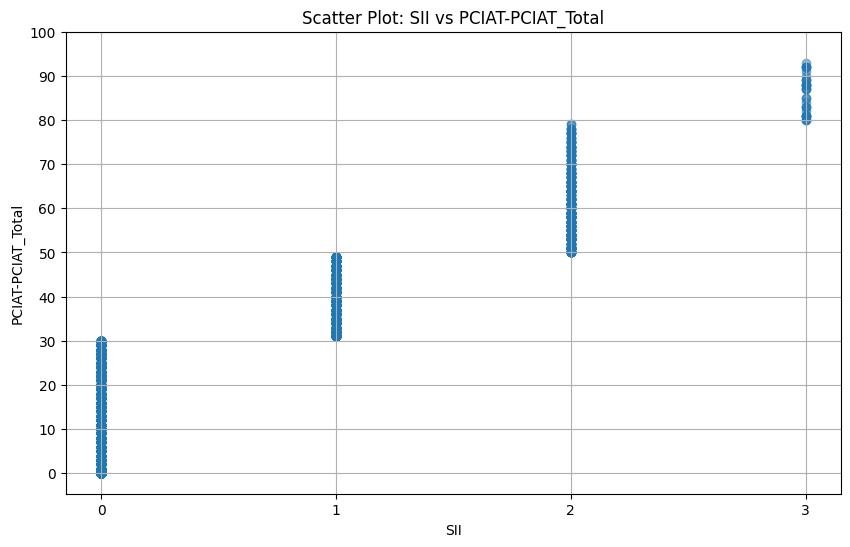

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(train_df['sii'].dropna(), train_df['PCIAT-PCIAT_Total'].dropna(), alpha=0.5)

# defining axis ticks
plt.xticks([0, 1, 2, 3])
plt.yticks(range(0, int(train_df['PCIAT-PCIAT_Total'].max()) + 10, 10))

# labels and title
plt.xlabel('SII')
plt.ylabel('PCIAT-PCIAT_Total')
plt.title('Scatter Plot: SII vs PCIAT-PCIAT_Total')

# Show the plot
plt.grid()
plt.show()